# Project Name :- Local Food Wastage Management System

#### Name             :- Purva Rajan Dhadve (1st August Batch)
#### Type               :- 
#### Contribution  :- Individual

# Project Summary

Food wastage has become a critical issue worldwide, leading to not only economic loss but also ethical and environmental concerns. The Food Wastage Management System is designed to address this problem by providing a digital platform that connects food providers (restaurants, hotels, canteens, households) with receivers (NGOs, food banks, needy individuals).

The system enables providers to register surplus food items and make them visible to potential receivers in real time. Receivers can view availability based on location, quality, and quantity, and request food accordingly. This ensures that edible food is not wasted but rather redirected to those in need.

# Github Link

# Problem Statement

## Import Necessary Libraries

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Make plots display nicely inside jupyter
%matplotlib inline

##  Load CSV files

In [2]:
# Load all four datasets
providers = pd.read_csv("providers_data.csv")
receivers = pd.read_csv("receivers_data.csv")
food_listing = pd.read_csv("food_listings_data.csv")
claims = pd.read_csv("claims_data.csv")

## Datasets first view

In [3]:
print("Providers:")
providers.head()

Providers:


,Provider_ID,Name,Type,Address,City,Contact
0,1,Gonzales-Cochran,Supermarket,"74347 Christopher Extensions\nAndreamouth, OK ...",New Jessica,+1-600-220-0480
1,2,"Nielsen, Johnson and Fuller",Grocery Store,"91228 Hanson Stream\nWelchtown, OR 27136",East Sheena,+1-925-283-8901x6297
2,3,Miller-Black,Supermarket,"561 Martinez Point Suite 507\nGuzmanchester, W...",Lake Jesusview,001-517-295-2206
3,4,"Clark, Prince and Williams",Grocery Store,"467 Bell Trail Suite 409\nPort Jesus, IA 61188",Mendezmouth,556.944.8935x401
4,5,Coleman-Farley,Grocery Store,"078 Matthew Creek Apt. 319\nSaraborough, MA 53978",Valentineside,193.714.6577


In [4]:
print("Receivers:")
receivers.head()

Receivers:


,Receiver_ID,Name,Type,City,Contact
0,1,Donald Gomez,Shelter,Port Carlburgh,(955)922-5295
1,2,Laurie Ramos,Individual,Lewisburgh,761.042.1570
2,3,Ashley Mckee,NGO,South Randalltown,691-023-0094x856
3,4,Erika Rose,NGO,South Shaneville,8296491111
4,5,John Romero,Individual,Bakerport,067.491.0154


In [5]:
print("Food Listing:")
food_listing.head()

Food Listing:


,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1,Bread,43,3/17/2025,110,Grocery Store,South Kellyville,Non-Vegetarian,Breakfast
1,2,Soup,22,3/24/2025,791,Grocery Store,West James,Non-Vegetarian,Dinner
2,3,Fruits,46,3/28/2025,478,Catering Service,Lake Regina,Vegan,Breakfast
3,4,Fruits,15,3/16/2025,930,Restaurant,Kellytown,Vegan,Lunch
4,5,Soup,14,3/19/2025,279,Restaurant,Garciaport,Vegan,Dinner


In [6]:
print("Claims:")
claims.head()

Claims:


,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,1,164,908,Pending,3/5/2025 5:26
1,2,353,391,Cancelled,3/11/2025 10:24
2,3,626,492,Completed,3/21/2025 0:59
3,4,61,933,Cancelled,3/4/2025 9:08
4,5,345,229,Pending,3/14/2025 15:17


## Data Cleaning

In [7]:
# Drop duplicate rows for avoid double counting
providers.drop_duplicates(inplace=True)
receivers.drop_duplicates(inplace=True)
food_listing.drop_duplicates(inplace=True)
claims.drop_duplicates(inplace=True)

In [8]:
# Convert date columns
food_listing["Expiry_Date"] = pd.to_datetime(food_listing["Expiry_Date"], errors="coerce")
claims["Timestamp"] = pd.to_datetime(claims["Timestamp"], errors="coerce")

In [9]:
for df in[providers, receivers, food_listing, claims]:
    print(df.isnull().sum().sum())

0
0
0
0


In [10]:
# Fill missing text feilds with empty string
for df in[providers, receivers, food_listing, claims]:
    for col in df.select_dtypes(include="object").columns:
        df[col] = df[col].astype(str).str.strip()

## Create SQLite Database and Load Tables

In [11]:
# Create SQLite DB in file
conn = sqlite3.connect("food_waste.db")

In [12]:
# Load DataFrames into SQL tables
providers.to_sql("providers", conn, if_exists="replace", index=False)
receivers.to_sql("receivers", conn, if_exists="replace", index=False)
food_listing.to_sql("food_listing",conn, if_exists="replace",index=False)
claims.to_sql("claims", conn, if_exists="replace", index=False)

1000

In [13]:
print(" Database created with 4 tables")

 Database created with 4 tables


## Helper Function for Running Queries

In [14]:
def run_query(query, params=()):
    '''Run SQL query and return Pandas Dataframe'''
    return pd.read_sql_query(query, conn, params=params)

## Business Queries

### Food Providers & Receivers

#### 1.How many food providers and receivers are there in each city?

* 1. This shows which cities have the most providers and receivers.
* 2. It helps balance supply and demand - if receivers are high but providers are low, more donations are needed there. 

In [15]:
# providers count per city
qa='''
SELECT City, COUNT(*) AS Providers_Count
FROM providers
GROUP BY City
ORDER BY Providers_Count DESC
'''
print("Providers per City:")
display(run_query(qa))

# Receivers count per city
qb='''
SELECT City, COUNT(*) AS Receivers_Count
FROM receivers
GROUP BY City
ORDER BY Receivers_Count DESC
'''
print("Providers per city:")
display(run_query(qb))

Providers per City:


,City,Providers_Count
0,South Christopherborough,3
1,New Carol,3
2,Williamview,2
3,West Lauraborough,2
4,West Christopher,2
...,...,...
958,Alexanderchester,1
959,Aguirreville,1
960,Adamsville,1
961,Adamsview,1


Providers per city:


,City,Receivers_Count
0,New Christopher,3
1,Williamsfort,2
2,West Richard,2
3,West James,2
4,Stevenmouth,2
...,...,...
961,Alexanderbury,1
962,Aguilarstad,1
963,Aguilarbury,1
964,Adamland,1


#### 2.	Which type of food provider (restaurant, grocery store, etc.) contributes the most food?

* 1.Identifying which type of provider(e.g., restaurants or stores) contributes most helps recognize key donors and encourage   other types to participate more

In [16]:
# Check provider_type column in food_listing
q2 = '''
SELECT Provider_Type, COUNT(*) AS food_listing
FROM food_listing
GROUP BY Provider_Type
ORDER BY food_listing DESC
'''
print("Provider type contribution:")
run_query(q2)

Provider type contribution:


,Provider_Type,food_listing
0,Supermarket,267
1,Restaurant,258
2,Grocery Store,243
3,Catering Service,232


#### 3.	What is the contact information of food providers in a specific city?

* 1. Listing provider contact details makes it easier for receivers or NGOs to directly reach donors in their city

In [17]:
# Here i use a parameyerized query on "New Carol" city 
city = "New Carol"
q3 = '''
SELECT Name, Type AS Provider_Type, Contact
FROM providers
WHERE City = ?
'''
print(f"Provider contact in {city}:")
display(run_query(q3, (city,)))

Provider contact in New Carol:


,Name,Provider_Type,Contact
0,Bradford-Martinez,Supermarket,199.451.0254
1,Hammond LLC,Supermarket,001-324-482-4894
2,Hill-Russell,Grocery Store,075.630.9218


####  4.Which receivers have claimed the most food?

1. The most active receivers can be identified here.
2. They may represent communities or NGOs that need extra support.

In [18]:
# Here i join claims with receivers to count claims per receiver
q4 = '''
SELECT r.Name AS Receiver_Name, COUNT(c.Claim_ID) AS Total_Claims
FROM claims c
JOIN receivers r ON c.Receiver_ID = r.Receiver_ID
GROUP BY r.Name
ORDER BY Total_Claims DESC
LIMIT 10
'''
print("Top 10 receivers by number of claims:")
display(run_query(q4))

Top 10 receivers by number of claims:


,Receiver_Name,Total_Claims
0,William Frederick,5
1,Scott Hunter,5
2,Matthew Webb,5
3,Anthony Garcia,5
4,Kristine Martin,4
5,Kristina Simpson,4
6,Jennifer Nelson,4
7,Donald Caldwell,4
8,Chelsea Powell,4
9,Betty Reid,4


### Food Listings & Availability

#### 5.What is the total quantity of food available from all providers?

* 1.The total available quantity gives an idea of how much food is ready to be redistributed at any time.

In [19]:
# Here i sum the Quantity column in food_listing.
q5 = '''
SELECT SUM(Quantity) AS Total_Quantity_Available
FROM food_listing
'''
print("Total food quantity available:")
display(run_query(q5))

Total food quantity available:


,Total_Quantity_Available
0,25794


#### 6.Which city has the highest number of food listings?

  1. The city with most listings shows where donor activity is strongest.
  2. Other cities with fewer listings may need more awareness campaigns.

In [20]:
q6 = '''
SELECT Location AS City, COUNT(Food_ID) AS Total_Listing
FROM food_listing
GROUP BY Location
ORDER BY Total_Listing DESC
'''
print("Food listing per city")
display(run_query(q6))

Food listing per city


,City,Total_Listing
0,South Kathryn,6
1,New Carol,6
2,Perezport,5
3,Jimmyberg,5
4,East Angela,5
...,...,...
619,Andersonmouth,1
620,Amandashire,1
621,Allenborough,1
622,Alexanderchester,1


#### 7.	What are the most commonly available food types?

 1. Knowing the most available food types helps receivers plan meals and also shows donation trends(e.g., vegetables,rice).

In [21]:
# here i group by Food_Type and count
q7 = '''
SELECT Food_Type, COUNT(*) AS Listing
FROM food_listing
GROUP BY Food_Type
ORDER BY Listing DESC
'''
print("Most common food types (top 10): ")
display(run_query(q7))

Most common food types (top 10): 


,Food_Type,Listing
0,Vegetarian,336
1,Vegan,334
2,Non-Vegetarian,330


###  Claims & Distribution

#### 8.How many food claims have been made for each food item?

1. Food items with the most claims are in highest demand.
2. This can guide providers on what food is most useful for donations.

In [22]:
q8 = '''
SELECT fl.Food_Name, COUNT(c.claim_ID) AS Total_Claims
FROM food_listing fl
LEFT JOIN claims c ON fl.Food_ID = c.Food_ID
GROUP BY fl.Food_Name
ORDER BY Total_Claims DESC
'''
print("Claims per food item: ")
display(run_query(q8))

Claims per food item: 


,Food_Name,Total_Claims
0,Rice,122
1,Soup,114
2,Dairy,110
3,Fish,108
4,Salad,106
5,Chicken,102
6,Bread,94
7,Pasta,87
8,Vegetables,86
9,Fruits,71


#### 9. Which provider has had the highest number of successful food claims?

1. This shows which provider makes the biggest impact.
2. They can be rewarded or recognized as role models for other donors.

In [23]:
q9 = '''
SELECT p.Name AS Provider, COUNT(*) AS Successful_Claims
FROM claims c
JOIN food_listing fl ON c.Food_ID = fl.Food_ID
JOIN providers p ON p.Provider_ID = fl.Provider_ID
WHERE LOWER(c.Status) = 'completed'
GROUP BY p.Name
ORDER BY Successful_Claims DESC
LIMIT 1
'''
print("Provider with most successful claims:")
display(run_query(q9))

Provider with most successful claims:


,Provider,Successful_Claims
0,Barry Group,5


#### 10. What percentage of food claims are completed vs. pending vs. canceled?

1. The share of completed vs. pending vs. cancelled claims helps track system efficiency.
2. A high pending/cancelled rate may delays or mismatches in supply-demand.

In [24]:
q10 = """
SELECT Status, 
       COUNT(*) AS Total_Claims,
       ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM claims), 2) AS Percentage
FROM claims
GROUP BY Status
ORDER BY Total_Claims DESC
"""
print("✅ Claim status distribution:")
display(run_query(q10))

✅ Claim status distribution:


,Status,Total_Claims,Percentage
0,Completed,339,33.9
1,Cancelled,336,33.6
2,Pending,325,32.5


## Analysis & Insights

#### 11. What is the average quantity of food claimed per receiver?

1. Some receivers claim larger quantities than others.
2. This indicates where the need is greatest and helps manage fair distribution.

In [25]:
q11 = '''
SELECT r.Name AS Receiver_Name, ROUND(AVG(fl.Quantity), 2) AS Avg_Claimed_Quantity
FROM claims c
JOIN receivers r ON c.Receiver_ID = r.Receiver_ID
JOIN food_listing fl ON c.Food_ID = fl.Food_ID
GROUP BY r.Name
ORDER BY Avg_Claimed_Quantity DESC
'''
print("Average food quantity claimed per receiver:")
display(run_query(q11))

Average food quantity claimed per receiver:


,Receiver_Name,Avg_Claimed_Quantity
0,Thomas Villanueva,50.0
1,Peggy Knight,50.0
2,Nancy Silva,50.0
3,Nancy Jones,50.0
4,Lisa Pitts,50.0
...,...,...
615,Kenneth Barnes,2.0
616,John Reynolds,2.0
617,Corey Rodriguez,2.0
618,Joshua Hooper,1.0


#### 12. Which meal type (breakfast, lunch, dinner, snacks) is claimed the most?

1. If dinner is claimed most, it suggests receivers prioritize evening meals.
2. This helps providers plan which meals to donate more often.

In [26]:
q12 = '''
SELECT fl.Meal_Type, COUNT(*) AS Total_Claims
FROM claims c
JOIN food_listing fl ON c.Food_ID = fl.Food_ID
GROUP BY fl.Meal_Type
ORDER BY Total_Claims DESC
'''
print("Claims by meal type:")
display(run_query(q12))

Claims by meal type:


,Meal_Type,Total_Claims
0,Breakfast,278
1,Lunch,250
2,Snacks,240
3,Dinner,232


####  13.What is the total quantity of food donated by each provider?

1. This shows which providers donate the most food overall.
2. It highlights top contributors and inspires others to increase their donations.

In [27]:
q13 = '''
SELECT p.Name AS Provider, SUM(fl.Quantity) AS Total_Donated_Quantity
From food_listing fl
JOIN providers p ON fl.Provider_ID = p.Provider_ID
GROUP BY p.Name
ORDER BY Total_Donated_Quantity DESC
'''
print("Total food donated by each provider:")
display(run_query(q13))

Total food donated by each provider:


,Provider,Total_Donated_Quantity
0,Miller Inc,217
1,Barry Group,179
2,"Evans, Wright and Mitchell",158
3,Smith Group,150
4,Campbell LLC,145
...,...,...
623,Reyes and Sons,1
624,Norris-Townsend,1
625,Mcgee PLC,1
626,"Martinez, Armstrong and Carroll",1


## CRUD Operations(Insert, Update, Delete)

### INSERT

In [28]:
# from this process we can modify data inside the database.
# INSERT a new food listing
conn.execute('''
INSERT INTO food_listing
(Food_ID, Food_Name, Quantity, Expiry_Date, Provider_ID, Provider_Type, Location, Food_Type, Meal_Type)
VALUES(1001, "Vegetable Pack", 15, "2025-08-20", 1, "Restaurant", "Pune", "Vegetables", "Dinner")
''')
conn.commit()

In [32]:
run_query("Select * FROM Food_listing WHERE Food_ID = 1001")

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type
0,1001,Vegetable Pack,15,2025-08-20,1,Restaurant,Pune,Vegetables,Dinner


### UPDATE

In [36]:
# UPDATE a claim status(in claim_id=4 Status was "cancelled" and here i update with "completed")
conn.execute("UPDATE claims SET Status = 'completed' WHERE Claim_ID=4")
conn.commit()
print("Claim status updated successfully!")            

Claim status updated successfully!


In [37]:
run_query("SELECT * FROM claims WHERE Claim_ID=4")

,Claim_ID,Food_ID,Receiver_ID,Status,Timestamp
0,4,61,933,completed,2025-03-04 09:08:00


###  DELETE

In [38]:
# DELETE a test listing for cleanup
conn.execute("DELETE FROM food_listing WHERE Food_ID = 1001")
conn.commit()
print("Test food listing deleted successfully!")

Test food listing deleted successfully!


In [41]:
run_query("SELECT * FROM food_listing WHERE Food_ID = 1001")

,Food_ID,Food_Name,Quantity,Expiry_Date,Provider_ID,Provider_Type,Location,Food_Type,Meal_Type


## EDA and Visualization

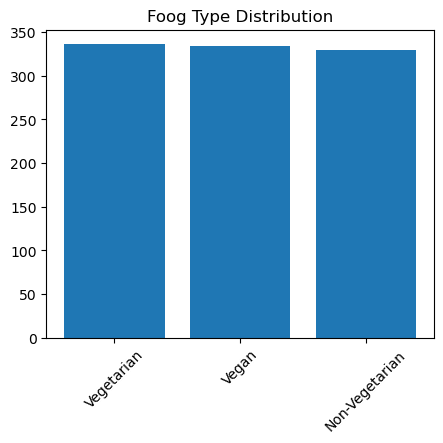

In [44]:
# Food type distribution(Bar Chart)
food_counts = run_query("""
SELECT Food_Type, COUNT(*) as Listings
FROM food_listing
GROUP BY Food_Type
ORDER BY Listings DESC
""")

plt.figure(figsize=(5,4))
plt.bar(food_counts["Food_Type"], food_counts["Listings"])
plt.xticks(rotation=45)
plt.title("Foog Type Distribution")
plt.show()

* Why use?
1. Bar chart compares number of listing by food type

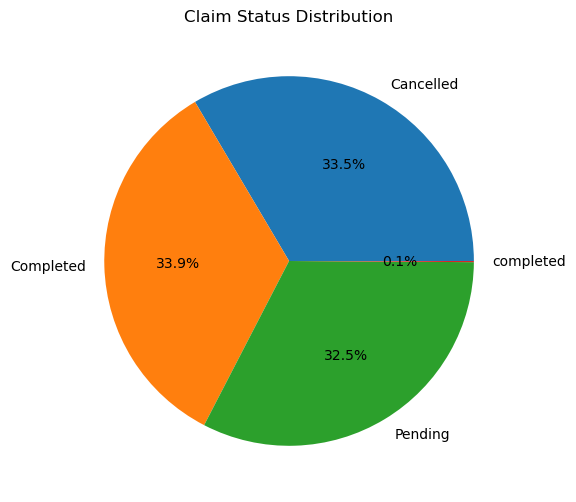

In [46]:
# Claim status distribution (pie chart)
status = run_query(""" 
SELECT Status, COUNT(*) as Count
FROM claims
GROUP BY Status
""")

plt.figure(figsize=(6,6))
plt.pie(status["Count"], labels=status["Status"], autopct="%1.1f%%")
plt.title("Claim Status Distribution")
plt.show()

* Why use?
1. Pie chart shows claim status percentages (completed vs pending vs cancelled)

#  For Run Streamlit app


#### Open Anaconda powershell prompt in that run
#### cd C:\Users\user\OneDrive\Desktop\Food_Project
#### streamlit run app1.py